In [65]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [71]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = yf.download(ticker,start = '1995-1-1')['Close']

[*********************100%***********************]  1 of 1 completed


In [72]:
log_returns = np.log(1 + data.pct_change())

In [73]:
r = 0.025

In [74]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.220112
dtype: float64

In [75]:
type(stdev)

pandas.core.series.Series

In [76]:
stdev = stdev.values
stdev

array([0.22011192])

In [77]:
T = 1.0
t_intervals = 250
delta_t = T / t_intervals

iterations = 1000

In [80]:
z = np.random.standard_normal((t_intervals + 1, iterations))
s = np.zeros_like(z)
s0 = data.iloc[-1]
s[0] = s0

In [81]:
for t in range(1, t_intervals + 1):
    s[t] = s[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * z[t])
    s

In [82]:
s.shape

(251, 1000)

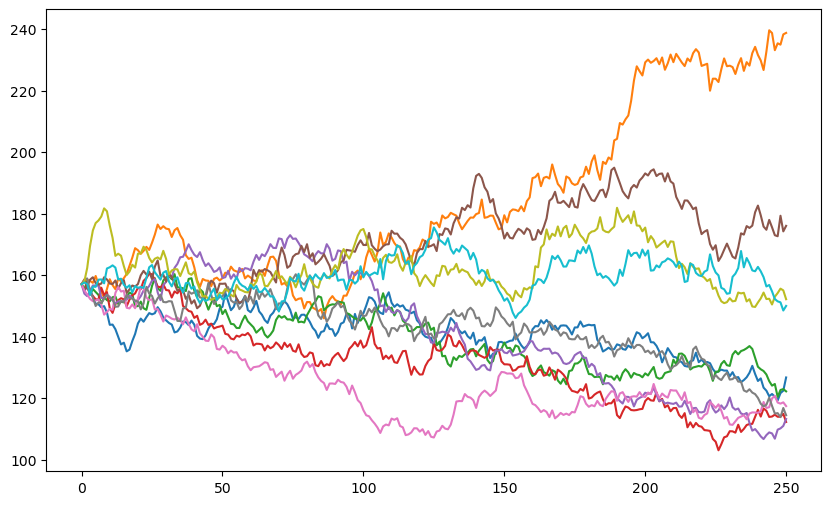

In [88]:
plt.figure(figsize = (10,6))
plt.plot(s[:,:10])
plt.show()

In [89]:
p = np.maximum(s[-1] - 110,0)
p

array([ 16.71664937, 128.79874648,  12.19744176,   2.23917954,
         3.20938056,  66.03249762,   7.40965507,   4.43549774,
        42.16839404,  39.98395739,  63.03908901,   5.71843729,
        30.2590372 ,  85.66100598,  96.2428846 ,  44.20837554,
        58.024565  ,  62.73557473,  55.80349624, 145.76309285,
        52.23455364, 106.51995979,  28.64306068,  72.98080473,
         5.08069641,  58.53476507,  31.62780295,  49.4743739 ,
        99.37245737,  22.97319976,  15.66633834,  28.70308779,
        30.79780565,  83.67112115,  66.03994312,  27.39789882,
        34.78709143,  25.74978067,  35.11168449,  48.59640673,
        33.46173065,  16.73247878,  12.59594698, 135.76345802,
       173.89060428,  18.34170328, 102.87733451, 161.46648738,
        15.56253274,  97.7145136 ,  33.73026819,  64.08234703,
       104.82836038,  86.85147276,  63.22069736, 123.91870281,
         7.54133923,  60.23367173,  46.53341611,  65.15206711,
        37.60005577,  45.22820653,  57.037429  ,  50.31

In [90]:
p.shape

(1000,)

In [91]:
c = np.exp(-r * T) * np.sum(p) / iterations
c

np.float64(49.46038670448655)